## Clean Code

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import tree
import os
import xlrd
import pandas as pd
import seaborn
%matplotlib inline
import csv
from csv import reader
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import pickle
RF_SEED = 30

In [2]:
# Read the csv file into a pandas DataFrame

Property = pd.read_csv('Resources/Property.csv')
Property

C:\Users\coset\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Parcel_ID,Parcel_Acreage,Property_Street_Address,Property_City,Property_State,Property_Zip,Parcel_Vacancy,Conveyance_Date,Property_Sales_Price,Seller_City,...,Buyer_ZIP,Primary_Residence,Assessed_Value_Land,Assessed_Value_Improvement,Total_Assessed_Value,Property_Class_Code,Class_Code_General,Class_Code_Translated,County_ID,County_Name
0,4574368,0.169,3909 MARIAH DRIVE ...,NEW ALBANY,IN,41750,N,6/2/2020,179900.0,NEW ALBANY,...,47150,Y,43800.0,138500.0,182300.0,510.0,500,Residential,22,Floyd
1,4515880,0.134,4110 E 10TH STREET,INDIAAPOLIS,IN,42601,N,10/19/2020,48000.0,Petaluma,...,46074,N,5000.0,88500.0,93500.0,510.0,500,Residential,49,Marion
2,4454504,0.172,5404 OAK HARBOR CT,INDIANAPOLIS,IN,42637,N,6/18/2020,195000.0,Indianapolis,...,46237,Y,30000.0,158000.0,188000.0,520.0,500,Residential,49,Marion
3,4421719,NaN,6516 EMERALD HILL COURT #310,INDIANAPOLIS,IN,42637,N,5/1/2020,120000.0,Franklin,...,42637,Y,10400.0,77900.0,88300.0,550.0,500,Residential,49,Marion
4,4531964,2.155,6335 Intech Commons Drive,Indianapolis,IN,42678,N,12/16/2020,1785000.0,MIAMI BEACH,...,75093,N,845000.0,957900.0,1802900.0,425.0,400,Commercial,49,Marion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184184,4666351,4000.000,301 S COBB St ...,PINE VILLAGE,IN,47975,N,5/19/2020,90000.0,WILLIAMSPORT,...,47975,Y,13200.0,51300.0,64500.0,510.0,500,Residential,86,Warren
184185,4666542,2000.000,405 E Fifth St ...,West Lebanon,IN,47991,N,11/4/2020,78000.0,LAFAYETTE,...,47991,Y,5600.0,41100.0,46700.0,510.0,500,Residential,86,Warren
184186,4666463,2700.000,120 W Third ...,Williamsport,IN,47993,N,7/20/2020,11250.0,WEST LEBANON,...,47906,N,8600.0,58600.0,67200.0,511.0,500,Residential,86,Warren
184187,4666265,1564.000,206 Sycamore Dr ...,Williamsport,IN,47993,N,1/31/2020,200000.0,LAFAYETTE,...,47993,Y,7500.0,1700.0,9200.0,599.0,500,Residential,86,Warren


In [3]:
len(Property)

184189

In [4]:
#Drop NA's from DF
pd.DataFrame(Property).dropna()
Property.head()
Property_df = Property[~Property.isin([np.nan, np.inf, -np.inf]).any(1)]
len(Property_df)

180360

In [5]:
#Select 5 Columns of DF
#Property_df=Property_df[['Property_Sales_Price','Total_Assessed_Value','Parcel_Acreage','Parcel_Vacancy','Class_Code_Translated']]
Property_df=Property_df[['Property_Sales_Price','Class_Code_Translated','Total_Assessed_Value','Parcel_Acreage','Parcel_Vacancy']]
Property_df.head()

,Property_Sales_Price,Class_Code_Translated,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy
0,179900.0,Residential,182300.0,0.169,N
1,48000.0,Residential,93500.0,0.134,N
2,195000.0,Residential,188000.0,0.172,N
4,1785000.0,Commercial,1802900.0,2.155,N
5,257575.0,Residential,210900.0,0.201,N


In [6]:
num_col = ['Property_Sales_Price','Total_Assessed_Value', 'Parcel_Acreage']

In [7]:

# outliers
print(Property_df[(np.abs(stats.zscore(Property_df[num_col])) > 3)].shape)
# good data
print(Property_df[(np.abs(stats.zscore(Property_df[num_col])) < 3).all(axis=1)].shape)

(646, 5)
(179715, 5)


In [8]:
#Git Rid of Outliers
Property_df = Property_df[(np.abs(stats.zscore(Property_df[num_col])) < 3).all(axis=1)].reset_index()
Property_df


,index,Property_Sales_Price,Class_Code_Translated,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy
0,0,179900.0,Residential,182300.0,0.169,N
1,1,48000.0,Residential,93500.0,0.134,N
2,2,195000.0,Residential,188000.0,0.172,N
3,4,1785000.0,Commercial,1802900.0,2.155,N
4,5,257575.0,Residential,210900.0,0.201,N
...,...,...,...,...,...,...
179710,184184,90000.0,Residential,64500.0,4000.000,N
179711,184185,78000.0,Residential,46700.0,2000.000,N
179712,184186,11250.0,Residential,67200.0,2700.000,N
179713,184187,200000.0,Residential,9200.0,1564.000,N


In [9]:
#One Hot encoding for non Numerical 
Property_df = pd.get_dummies(data = Property_df, columns=['Parcel_Vacancy','Class_Code_Translated'])
Property_df


,index,Property_Sales_Price,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy_N,Parcel_Vacancy_Y,Class_Code_Translated_Agricultural,Class_Code_Translated_Commercial,Class_Code_Translated_Exempt,Class_Code_Translated_Industrial,Class_Code_Translated_Locally Assessed,Class_Code_Translated_Mineral,Class_Code_Translated_Residential
0,0,179900.0,182300.0,0.169,1,0,0,0,0,0,0,0,1
1,1,48000.0,93500.0,0.134,1,0,0,0,0,0,0,0,1
2,2,195000.0,188000.0,0.172,1,0,0,0,0,0,0,0,1
3,4,1785000.0,1802900.0,2.155,1,0,0,1,0,0,0,0,0
4,5,257575.0,210900.0,0.201,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179710,184184,90000.0,64500.0,4000.000,1,0,0,0,0,0,0,0,1
179711,184185,78000.0,46700.0,2000.000,1,0,0,0,0,0,0,0,1
179712,184186,11250.0,67200.0,2700.000,1,0,0,0,0,0,0,0,1
179713,184187,200000.0,9200.0,1564.000,1,0,0,0,0,0,0,0,1


In [10]:
df = Property_df.loc[:, Property_df.columns != 'Class_Code_Translated_Locally Assessed']
df

,index,Property_Sales_Price,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy_N,Parcel_Vacancy_Y,Class_Code_Translated_Agricultural,Class_Code_Translated_Commercial,Class_Code_Translated_Exempt,Class_Code_Translated_Industrial,Class_Code_Translated_Mineral,Class_Code_Translated_Residential
0,0,179900.0,182300.0,0.169,1,0,0,0,0,0,0,1
1,1,48000.0,93500.0,0.134,1,0,0,0,0,0,0,1
2,2,195000.0,188000.0,0.172,1,0,0,0,0,0,0,1
3,4,1785000.0,1802900.0,2.155,1,0,0,1,0,0,0,0
4,5,257575.0,210900.0,0.201,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179710,184184,90000.0,64500.0,4000.000,1,0,0,0,0,0,0,1
179711,184185,78000.0,46700.0,2000.000,1,0,0,0,0,0,0,1
179712,184186,11250.0,67200.0,2700.000,1,0,0,0,0,0,0,1
179713,184187,200000.0,9200.0,1564.000,1,0,0,0,0,0,0,1


In [11]:
df = Property_df.loc[:, Property_df.columns != 'Class_Code_Translated_Mineral']
df

,index,Property_Sales_Price,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy_N,Parcel_Vacancy_Y,Class_Code_Translated_Agricultural,Class_Code_Translated_Commercial,Class_Code_Translated_Exempt,Class_Code_Translated_Industrial,Class_Code_Translated_Locally Assessed,Class_Code_Translated_Residential
0,0,179900.0,182300.0,0.169,1,0,0,0,0,0,0,1
1,1,48000.0,93500.0,0.134,1,0,0,0,0,0,0,1
2,2,195000.0,188000.0,0.172,1,0,0,0,0,0,0,1
3,4,1785000.0,1802900.0,2.155,1,0,0,1,0,0,0,0
4,5,257575.0,210900.0,0.201,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179710,184184,90000.0,64500.0,4000.000,1,0,0,0,0,0,0,1
179711,184185,78000.0,46700.0,2000.000,1,0,0,0,0,0,0,1
179712,184186,11250.0,67200.0,2700.000,1,0,0,0,0,0,0,1
179713,184187,200000.0,9200.0,1564.000,1,0,0,0,0,0,0,1


In [12]:
#Git Rid of Index
df.drop(['index'],axis=1,inplace=True)



C:\Users\coset\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df = df.loc[df['Total_Assessed_Value']>0,:]
df = df.loc[df['Parcel_Acreage']>0,:]
#len(new_df)


## Model Build

In [14]:

#Seperate X and Y
y_data = df['Property_Sales_Price']

x_data = df.loc[:, df.columns != 'Property_Sales_Price']

In [15]:
    data = df.loc[:, df.columns !='Property_Sales_Price'] 
    print( df['Property_Sales_Price'], data, data.columns )


0          179900.0
1           48000.0
2          195000.0
3         1785000.0
4          257575.0
            ...    
179710      90000.0
179711      78000.0
179712      11250.0
179713     200000.0
179714     184000.0
Name: Property_Sales_Price, Length: 171928, dtype: float64         Total_Assessed_Value  Parcel_Acreage  Parcel_Vacancy_N  \
0                   182300.0           0.169                 1   
1                    93500.0           0.134                 1   
2                   188000.0           0.172                 1   
3                  1802900.0           2.155                 1   
4                   210900.0           0.201                 1   
...                      ...             ...               ...   
179710               64500.0        4000.000                 1   
179711               46700.0        2000.000                 1   
179712               67200.0        2700.000                 1   
179713                9200.0        1564.000                 

In [16]:
feature_names = data.columns

In [17]:
data.shape

(171928, 10)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171928 entries, 0 to 179714
Data columns (total 10 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Total_Assessed_Value                    171928 non-null  float64
 1   Parcel_Acreage                          171928 non-null  float64
 2   Parcel_Vacancy_N                        171928 non-null  uint8  
 3   Parcel_Vacancy_Y                        171928 non-null  uint8  
 4   Class_Code_Translated_Agricultural      171928 non-null  uint8  
 5   Class_Code_Translated_Commercial        171928 non-null  uint8  
 6   Class_Code_Translated_Exempt            171928 non-null  uint8  
 7   Class_Code_Translated_Industrial        171928 non-null  uint8  
 8   Class_Code_Translated_Locally Assessed  171928 non-null  uint8  
 9   Class_Code_Translated_Residential       171928 non-null  uint8  
dtypes: float64(2), uint8(8)
memory usage: 5.2 MB

In [19]:
data.describe()

,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy_N,Parcel_Vacancy_Y,Class_Code_Translated_Agricultural,Class_Code_Translated_Commercial,Class_Code_Translated_Exempt,Class_Code_Translated_Industrial,Class_Code_Translated_Locally Assessed,Class_Code_Translated_Residential
count,1.719280e+05,171928.000000,171928.000000,171928.000000,171928.000000,171928.000000,171928.000000,171928.000000,171928.000000,171928.000000
mean,1.471466e+05,2867.616932,0.894130,0.105870,0.060037,0.036736,0.005491,0.004793,0.000326,0.892606
std,3.574944e+05,21266.499256,0.307672,0.307672,0.237556,0.188114,0.073896,0.069063,0.018045,0.309614
min,9.000000e+01,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.060000e+04,0.179000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.090000e+05,0.345000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.827000e+05,4.725250,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.526210e+07,417500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


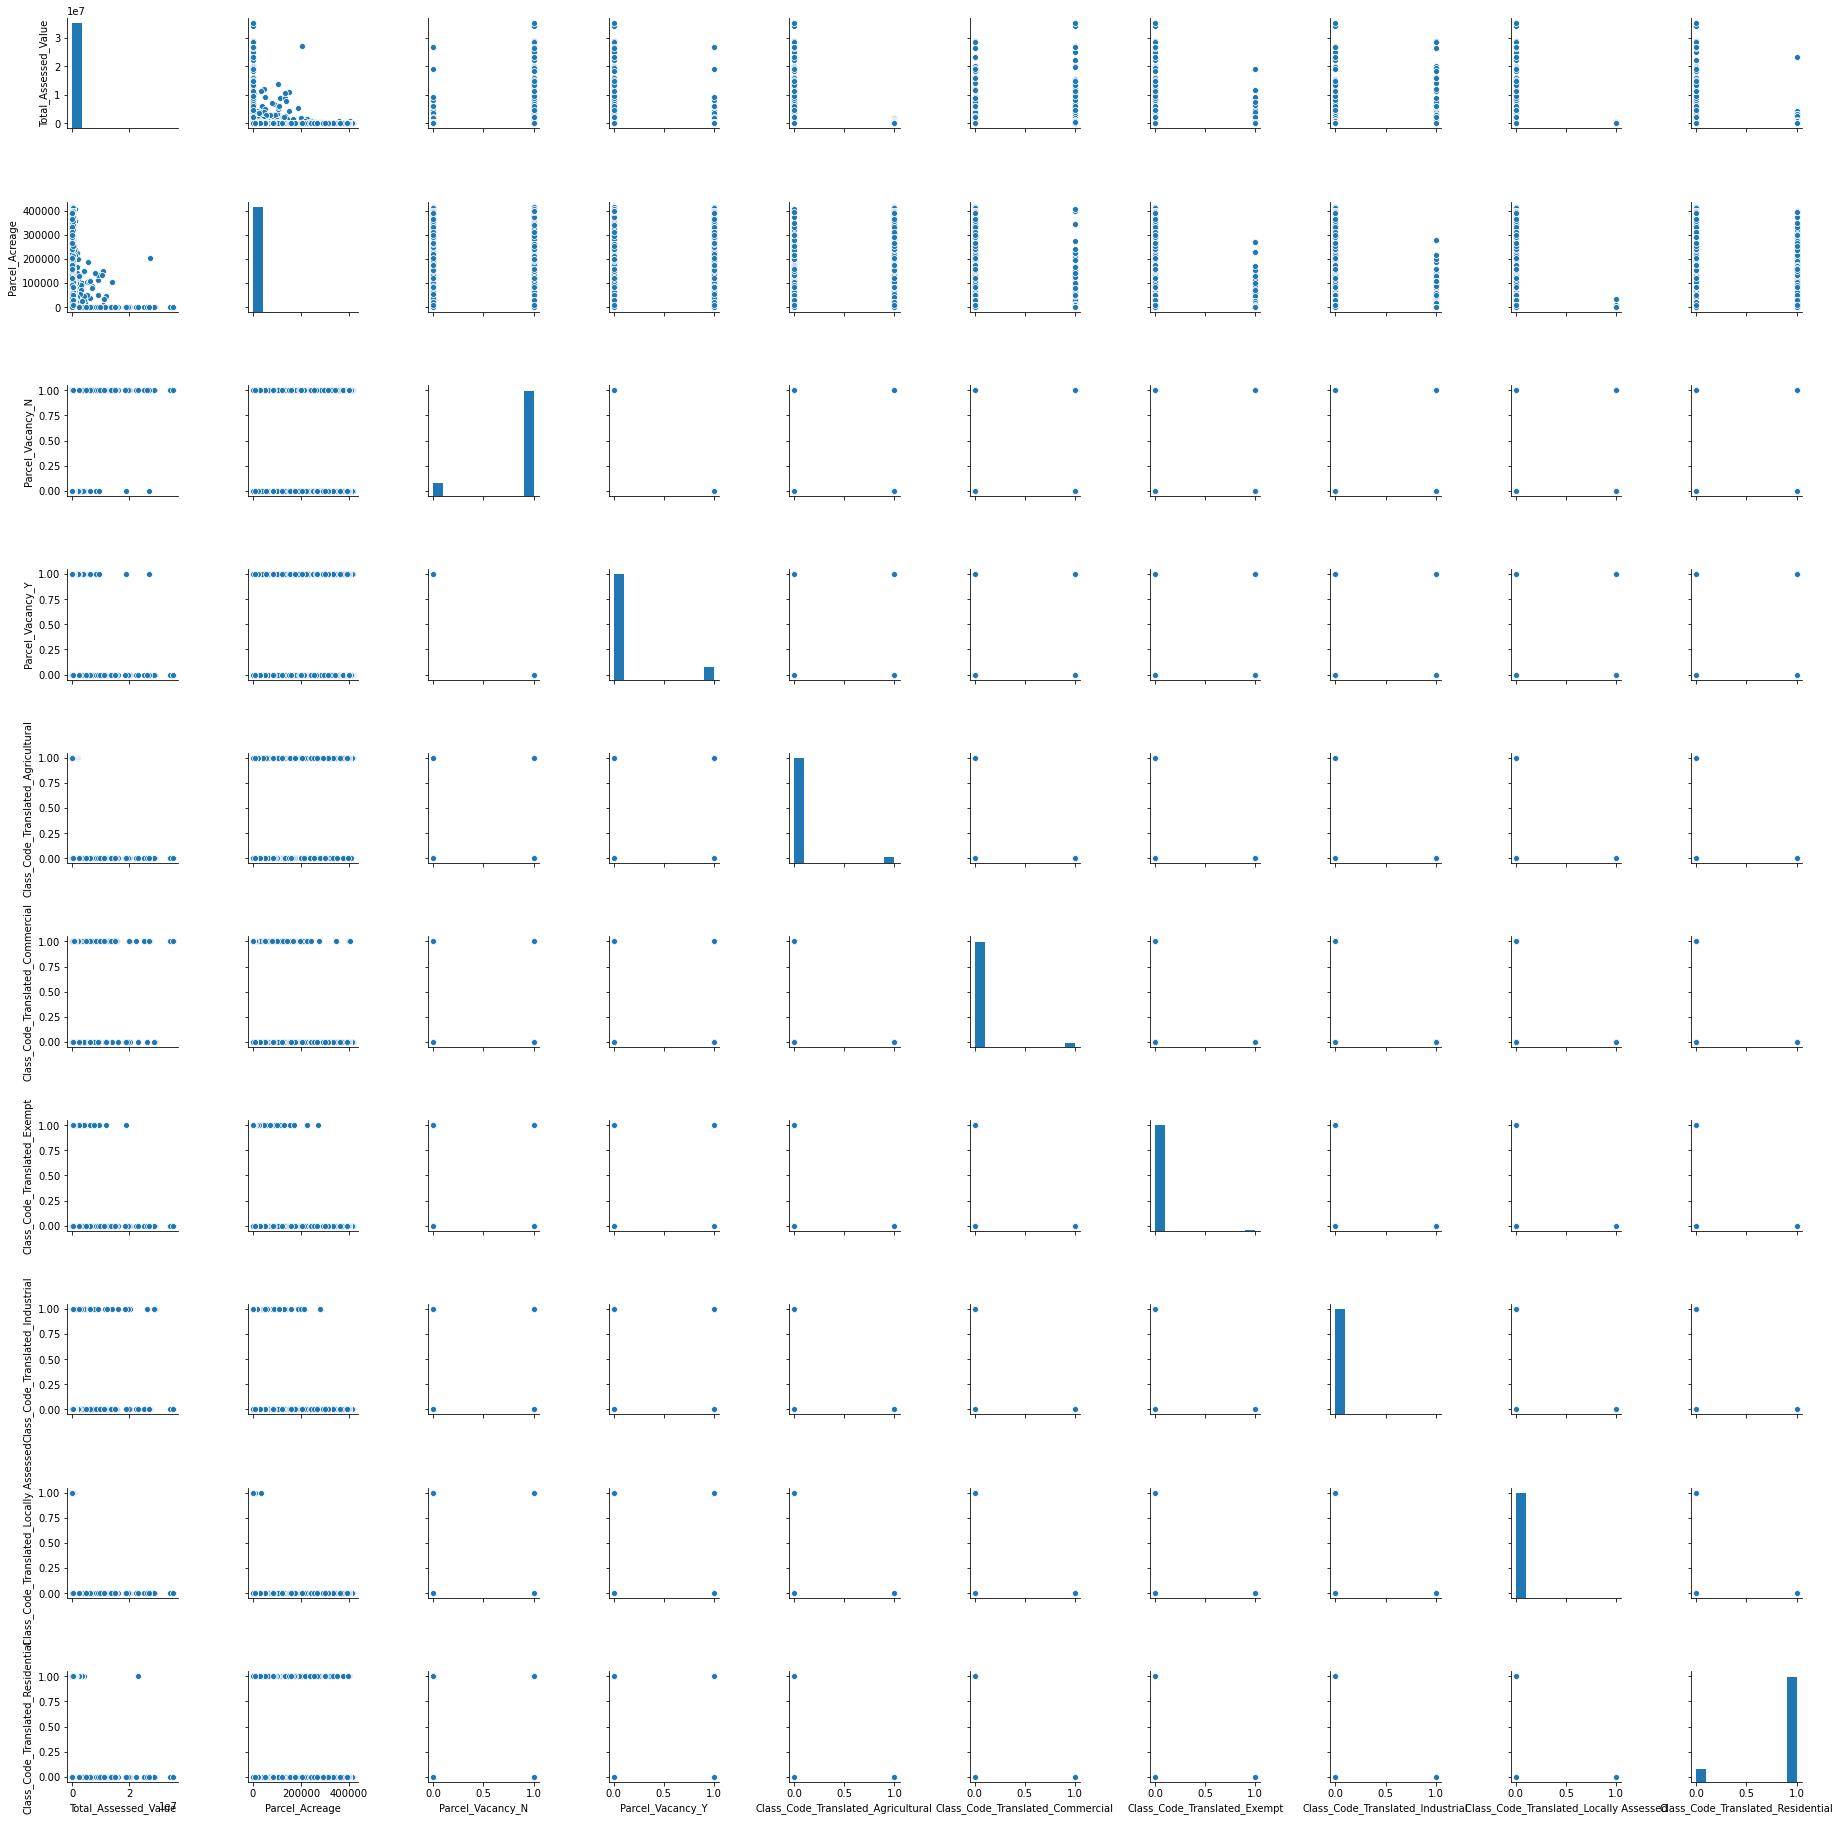

In [20]:

#to see pairwise relationships on our dataset we will check pairplot from seaborn library
seaborn.pairplot(data)

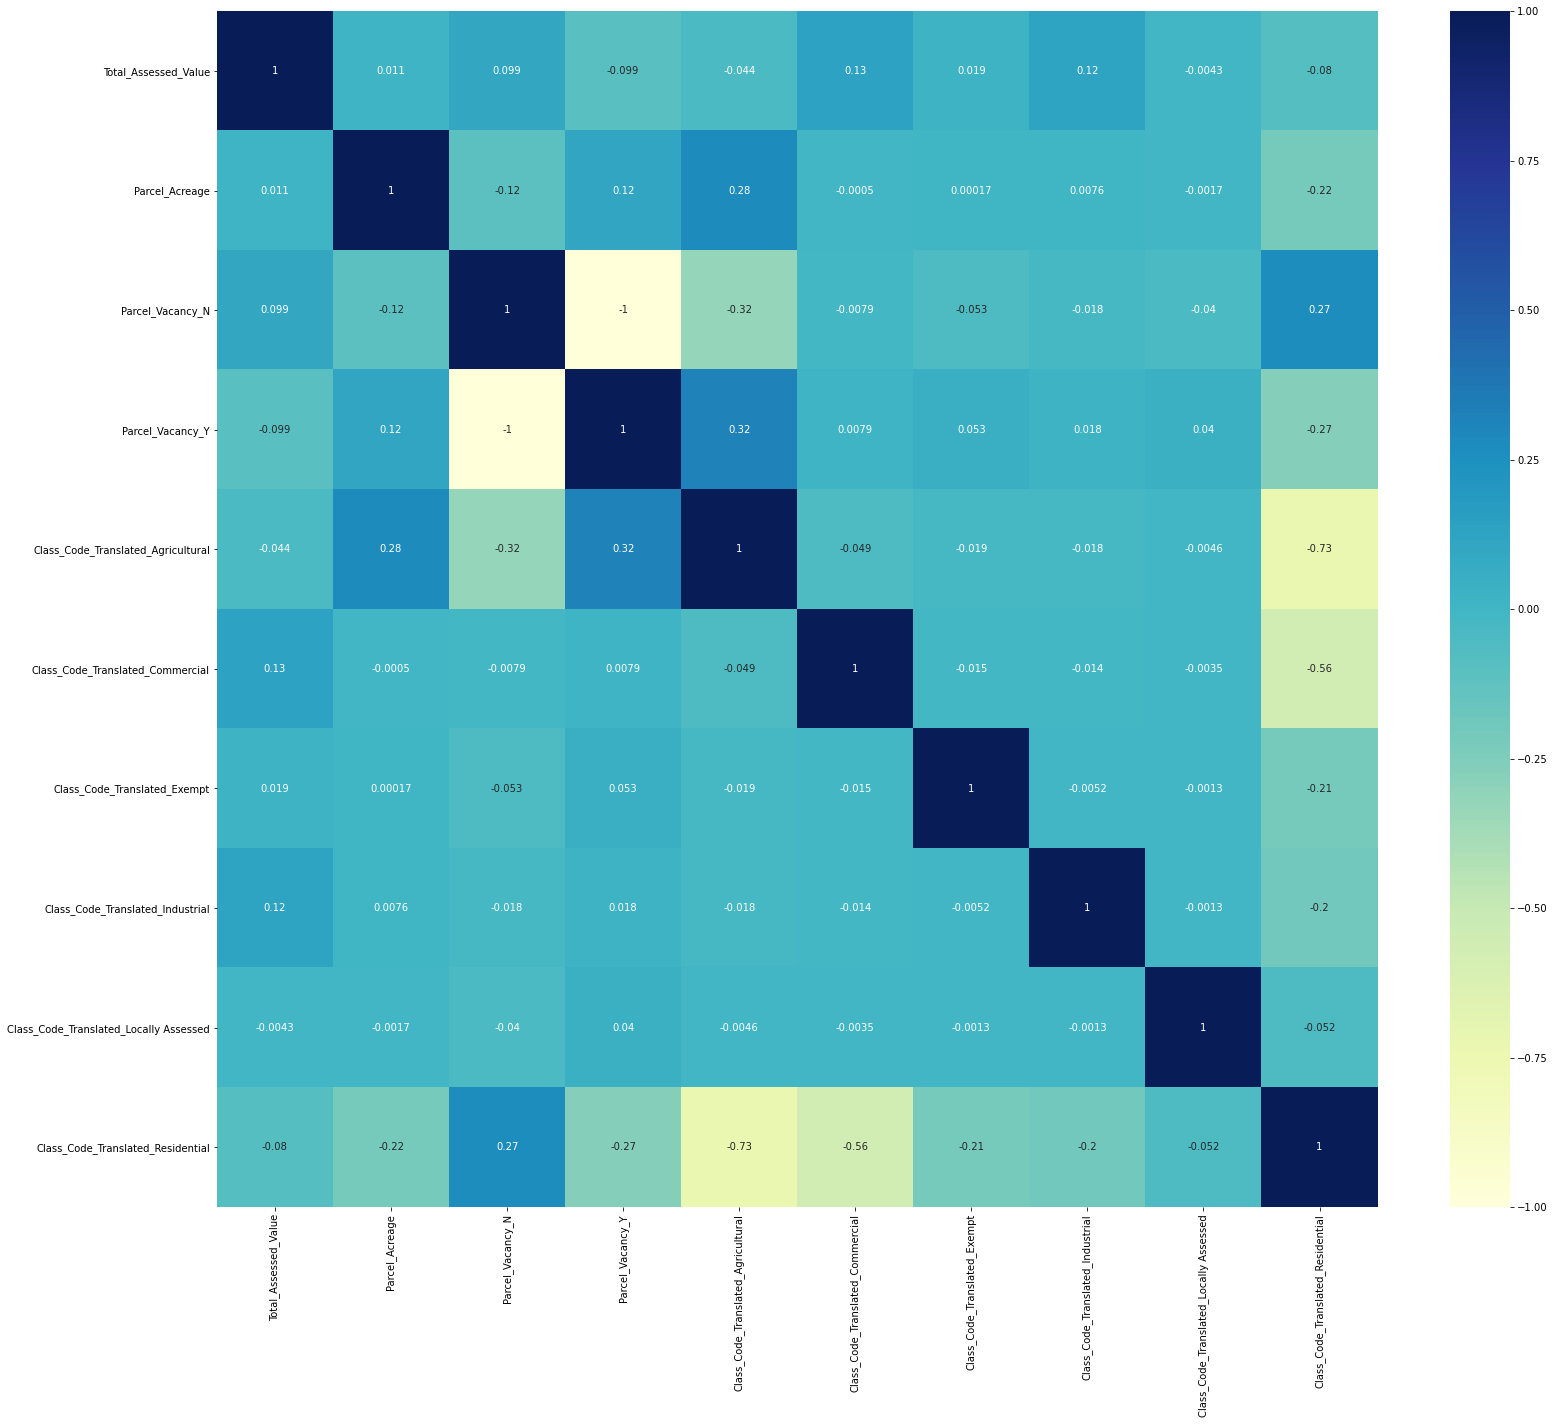

In [21]:
#create correlation matrix
correlations = data.corr()
indx=correlations.index

#plot this correlation for clear visualisation
plt.figure(figsize=(26,22))
#annot = True , dsiplays text over the cells.
#cmap = "YlGnBu" is nothing but adjustment of colors for our heatmap
seaborn.heatmap(data[indx].corr(),annot=True,cmap="YlGnBu")
#amount of darkness shows how our features are correalated with each other

In [22]:

def split_data_train_model(labels, data):
    labels = labels.values.reshape(-1,1)
    Xscaler = StandardScaler()
    Xscaler = Xscaler.fit(data)
    Xscaled = Xscaler.transform(data)
    Yscaler = StandardScaler()
    Yscaler = Yscaler.fit(labels)
    Yscaled = Yscaler.transform(labels)
    # 20% examples in test data
    train, test, train_labels, test_labels = train_test_split(Xscaled,
                                                              Yscaled,
                                                              test_size=0.2,
                                                              random_state=RF_SEED)
    print(train)
    print(train_labels)
# training data fit
    regressor = RandomForestRegressor(n_estimators = 100, random_state = RF_SEED, max_depth=5)
    regressor = regressor.fit(train, train_labels)
    regressor.score(train, train_labels)
    return test, test_labels, regressor, Xscaler, Yscaler 

In [23]:
x_test, y_test, regressor, Xscaler, Yscaler = split_data_train_model(y_data, x_data)
 
predictions_test = regressor.predict(x_test)
print(predictions_test)
print(y_test)


[[ 0.21749614 -0.13483062  0.34410097 ... -0.06939585 -0.01805059
   0.34686433]
 [ 0.05553512  5.02822269  0.34410097 ... -0.06939585 -0.01805059
   0.34686433]
 [-0.40992801 -0.04549972 -2.90612378 ... -0.06939585 -0.01805059
   0.34686433]
 ...
 [-0.24516973 -0.13483589  0.34410097 ... -0.06939585 -0.01805059
   0.34686433]
 [-0.27733815 -0.13482037  0.34410097 ... -0.06939585 -0.01805059
   0.34686433]
 [-0.36713002  8.1758585  -2.90612378 ... -0.06939585 -0.01805059
  -2.88297158]]
[[ 0.03678995]
 [ 0.01286669]
 [-0.22020891]
 ...
 [-0.18346306]
 [-0.11748339]
 [-0.27680015]]


<ipython-input-22-42d8c25516d8>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor = regressor.fit(train, train_labels)


[ 0.21600241 -0.05794131 -0.17802612 ... -0.05975297 -0.17802612
 -0.17802612]
[[ 0.31862613]
 [-0.07564262]
 [-0.32668722]
 ...
 [-0.24115825]
 [-0.18668158]
 [-0.23656864]]


In [36]:
# find the correlation between real answer and prediction
#correlation_test = round(pearsonr(predictions_test, x_test_labels)[0], 5)
#correlation_train = round(pearsonr(predictions_train, x_test_labels)[0], 5)
#print(correlation_test)
#print(correlation_train)

NameError: name 'predictions_train' is not defined

In [24]:
features_importance = regressor.feature_importances_
 
print("Feature ranking:")
for i, data_class in enumerate(feature_names):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))


Feature ranking:
1. Total_Assessed_Value (0.9008054327226898)
2. Parcel_Acreage (0.034778994751441805)
3. Parcel_Vacancy_N (0.011333780003932934)
4. Parcel_Vacancy_Y (0.009097596247766718)
5. Class_Code_Translated_Agricultural (3.3478437839405906e-05)
6. Class_Code_Translated_Commercial (0.008911729612291783)
7. Class_Code_Translated_Exempt (0.004120616016050264)
8. Class_Code_Translated_Industrial (0.008420819022620448)
9. Class_Code_Translated_Locally Assessed (0.0)
10. Class_Code_Translated_Residential (0.022497553185366916)


In [26]:
pickle.dump(regressor, open('model.pkl','wb'))

In [26]:
pickle.dump(Xscaler, open('Xscaler.pkl','wb'))

In [27]:
pickle.dump(Yscaler, open('Yscaler.pkl','wb'))